In [ ]:
# installation package kaggla
! pip install -q kaggle

In [ ]:
# creation d'un dossier kaggle
! mkdir ~/.kaggle/

In [ ]:
# copier kaggle.json dans le dosier kaggle
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
# donner les droits a kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                  Online Food Dataset                                  3KB  2024-03-02 18:50:30           9236        165  0.9411765        
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          19025        336  1.0              
julianoorlandi/spotify-top-songs-and-audio-features  Spotify Top Songs and Audio Features               526KB  2024-03-18 12:49:50           1202         23  1.0              
bhavikjikadara/student-study-performance             Student Study Performance                            9KB  2024-03-0

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 98% 85.0M/86.8M [00:04<00:00, 23.2MB/s]
100% 86.8M/86.8M [00:05<00:00, 17.8MB/s]


In [ ]:
! unzip /content/brain-tumor-classification-mri.zip -d datasets

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: datasets/Testing/glioma_tumor/image(1).jpg  
  inflating: datasets/Testing/glioma_tumor/image(10).jpg  
  inflating: datasets/Testing/glioma_tumor/image(100).jpg  
  inflating: datasets/Testing/glioma_tumor/image(11).jpg  
  inflating: datasets/Testing/glioma_tumor/image(12).jpg  
  inflating: datasets/Testing/glioma_tumor/image(13).jpg  
  inflating: datasets/Testing/glioma_tumor/image(14).jpg  
  inflating: datasets/Testing/glioma_tumor/image(15).jpg  
  inflating: datasets/Testing/glioma_tumor/image(16).jpg  
  inflating: datasets/Testing/glioma_tumor/image(17).jpg  
  inflating: datasets/Testing/glioma_tumor/image(18).jpg  
  inflating: datasets/Testing/glioma_tumor/image(19).jpg  
  inflating: datasets/Testing/glioma_tumor/image(2).jpg  
  inflating: datasets/Testing/glioma_tumor/image(20).jpg  
  inflating: datasets/Testing/glioma_tumor/image(21).jpg  
  inflating: datasets/Testing/glioma_tumor/image(22).jpg  
  i

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
KAGGLE_HOME_DIR = '/content/drive/MyDrive/kaggle/brain-tumor-classification-mri/Testing'
IMAGE_SIZE = 256
BATCH_SIZE = 250
CHANNELS =3
EPOCHS = 30

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

Data reading and pre-processing

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    KAGGLE_HOME_DIR,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE)


Found 3190 files belonging to 4 classes.


Recovering the various classes in our data

In [ ]:
class_labels = dataset.class_names
class_labels

['Normal', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

Some Images of the database

(250, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(250,), dtype=int32, numpy=
array([2, 2, 3, 0, 0, 1, 0, 3, 3, 2, 2, 0, 1, 1, 3, 0, 3, 1, 2, 1, 0, 1,
       1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 3, 2, 1, 3, 0, 0, 1, 3,
       0, 2, 2, 2, 2, 0, 1, 2, 2, 3, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2,
       0, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 3, 1, 3, 1, 2, 0, 3, 1, 1, 2, 3,
       2, 1, 2, 3, 1, 3, 3, 2, 1, 2, 0, 2, 2, 1, 2, 3, 3, 2, 2, 0, 2, 3,
       0, 1, 3, 1, 1, 2, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 2, 3, 2, 2, 3, 0,
       1, 3, 2, 1, 0, 2, 1, 3, 3, 0, 2, 2, 3, 2, 1, 3, 2, 2, 2, 0, 1, 1,
       3, 1, 0, 1, 2, 1, 2, 3, 0, 0, 3, 3, 2, 3, 1, 2, 2, 0, 2, 3, 3, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 3, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1,
       0, 2, 1, 3, 3, 2, 1, 1, 0, 3, 3, 2, 2, 3, 1, 1, 1, 1, 2, 1, 3, 0,
       2, 1, 1, 0, 2, 2, 3, 2], dtype=int32)>>


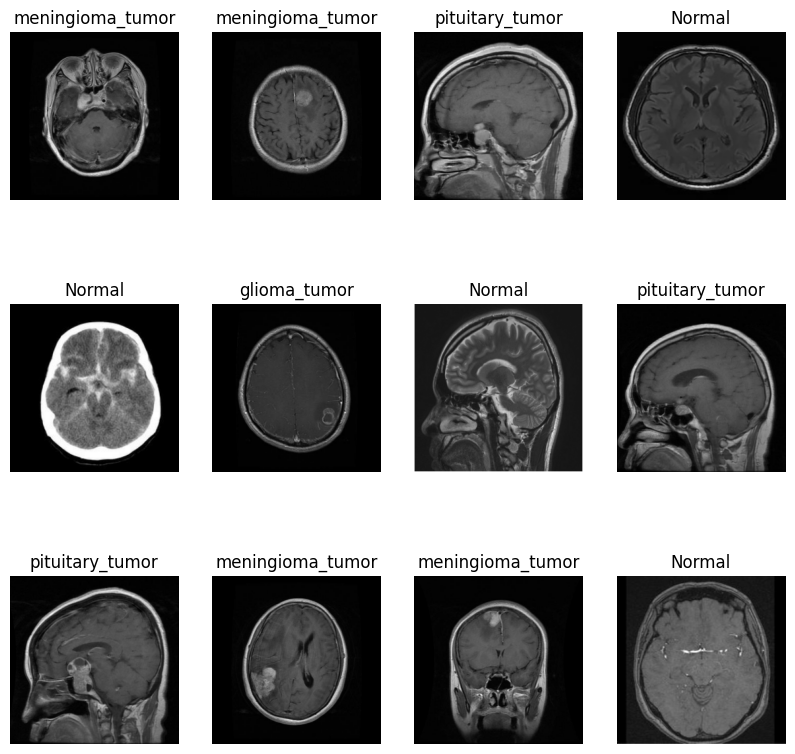

In [ ]:

plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy)
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_labels[label_batch[i]])
    plt.axis("off")

Division of our database in to training,validation and testing

In [ ]:
DATASET_SIZE = len(dataset)
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.10 * DATASET_SIZE)
test_size = int(0.10 * DATASET_SIZE)
dataset = dataset.shuffle(1000, seed=12)#La fonction shuffle() permet de mélanger l'ensemble de données avant de diviser les données en ensembles d'entraînement, de validation et de test.
train_dataset = dataset.take(train_size)#La méthode take() permet de prendre les premiers éléments de l'ensemble de données,
print(len(train_dataset))
test_dataset = dataset.skip(train_size)#la méthode skip() permet de sauter les premiers éléments de l'ensemble de données.
print(len(test_dataset))
val_dataset = test_dataset.take(val_size)
print(len(val_dataset))
test_dataset = test_dataset.skip(test_size)
print(len(test_dataset))

10
3
1
2


La méthode cache() est utilisée pour stocker en cache les éléments de l'ensemble de données après leur première utilisation. Cela permet d'accélérer le processus d'entraînement car les données sont chargées en mémoire au lieu d'être relues à partir du disque. La méthode shuffle() est utilisée pour mélanger l'ensemble de données afin de garantir que les exemples sont présentés à l'apprentissage dans un ordre aléatoire. La méthode prefetch() permet de précharger les données pour le traitement ultérieur.

In [ ]:
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
print(len(train_ds),len(val_ds),len(test_ds))

10 1 2


Resize and normalise images

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

Increased data

La map()fonction prend une fonction comme argument et applique cette fonction à chaque élément de l'ensemble de données.
La prefetch()fonction est utilisée pour améliorer les performances du processus de chargement des données. Il prélève un certain nombre de lots à l'avance, de sorte que le lot suivant soit prêt à être traité au moment où le lot en cours est terminé. L' tf.data.AUTOTUNEargument indique à TensorFlow de déterminer dynamiquement la taille optimale du tampon de prélecture en fonction des ressources système disponibles.

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

CNN architecture

In [ ]:

from tensorflow.keras import regularizers
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=4
model=None
model = models.Sequential([
        resize_and_rescale,
        layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (250, 256, 256, 3)        0         
                                                                 
 conv2d (Conv2D)             (250, 254, 254, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (250, 127, 127, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (250, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (250, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (250, 60, 60, 64)        

In [ ]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.4575 - accuracy: 0.8221

10/10 [==============================] - 25s 2s/step - loss: 0.4575 - accuracy: 0.8221 - val_loss: 0.3610 - val_accuracy: 0.8560
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.4462 - accuracy: 0.8291

10/10 [==============================] - 25s 2s/step - loss: 0.4462 - accuracy: 0.8291 - val_loss: 0.3828 - val_accuracy: 0.8440
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.8148

10/10 [==============================] - 25s 3s/step - loss: 0.4678 - accuracy: 0.8148 - val_loss: 0.3412 - val_accuracy: 0.9040
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.8238

10/10 [==============================] - 25s 2s/step - loss: 0.4563 - accuracy: 0.8238 - val_loss: 0.4317 - val_accuracy: 0.8280
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.4435 - accuracy: 0.8189

10/10 [==============================] - 24s 2s/step - loss: 0.4435 - accuracy: 0.8189 - val_loss: 0.3393 - val_accuracy: 0.8880
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.8295

10/10 [==============================] - 24s 2s/step - loss: 0.4309 - accuracy: 0.8295 - val_loss: 0.3274 - val_accuracy: 0.8560
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.4031 - accuracy: 0.8410

10/10 [==============================] - 25s 2s/step - loss: 0.4031 - accuracy: 0.8410 - val_loss: 0.3163 - val_accuracy: 0.8680
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.3843 - accuracy: 0.8496

10/10 [==============================] - 25s 2s/step - loss: 0.3843 - accuracy: 0.8496 - val_loss: 0.3440 - val_accuracy: 0.8800
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.3726 - accuracy: 0.8697

10/10 [==============================] - 25s 3s/step - loss: 0.3726 - accuracy: 0.8697 - val_loss: 0.2606 - val_accuracy: 0.9040
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8656

10/10 [==============================] - 25s 2s/step - loss: 0.3497 - accuracy: 0.8656 - val_loss: 0.2401 - val_accuracy: 0.9280
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.8652

10/10 [==============================] - 25s 2s/step - loss: 0.3505 - accuracy: 0.8652 - val_loss: 0.2400 - val_accuracy: 0.9160
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8717

10/10 [==============================] - 25s 2s/step - loss: 0.3408 - accuracy: 0.8717 - val_loss: 0.2676 - val_accuracy: 0.9080
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.8734

10/10 [==============================] - 25s 2s/step - loss: 0.3357 - accuracy: 0.8734 - val_loss: 0.2331 - val_accuracy: 0.9200
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 0.3213 - accuracy: 0.8721

10/10 [==============================] - 25s 2s/step - loss: 0.3213 - accuracy: 0.8721 - val_loss: 0.2330 - val_accuracy: 0.9280
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.8918

10/10 [==============================] - 25s 2s/step - loss: 0.2983 - accuracy: 0.8918 - val_loss: 0.2016 - val_accuracy: 0.9480
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 0.3073 - accuracy: 0.8914

10/10 [==============================] - 25s 2s/step - loss: 0.3073 - accuracy: 0.8914 - val_loss: 0.2411 - val_accuracy: 0.9120
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 0.3320 - accuracy: 0.8795

10/10 [==============================] - 25s 2s/step - loss: 0.3320 - accuracy: 0.8795 - val_loss: 0.2389 - val_accuracy: 0.9280
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.8734

10/10 [==============================] - 25s 2s/step - loss: 0.3214 - accuracy: 0.8734 - val_loss: 0.3524 - val_accuracy: 0.8280
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 0.3124 - accuracy: 0.8848

10/10 [==============================] - 25s 2s/step - loss: 0.3124 - accuracy: 0.8848 - val_loss: 0.2607 - val_accuracy: 0.8960
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 0.3146 - accuracy: 0.8824

10/10 [==============================] - 25s 2s/step - loss: 0.3146 - accuracy: 0.8824 - val_loss: 0.2574 - val_accuracy: 0.9160
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 0.2931 - accuracy: 0.8922

10/10 [==============================] - 25s 2s/step - loss: 0.2931 - accuracy: 0.8922 - val_loss: 0.2805 - val_accuracy: 0.8880
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 0.2749 - accuracy: 0.9004

10/10 [==============================] - 25s 2s/step - loss: 0.2749 - accuracy: 0.9004 - val_loss: 0.2094 - val_accuracy: 0.9280
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.9041

10/10 [==============================] - 25s 2s/step - loss: 0.2512 - accuracy: 0.9041 - val_loss: 0.2025 - val_accuracy: 0.9400
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 0.2597 - accuracy: 0.9037

10/10 [==============================] - 25s 2s/step - loss: 0.2597 - accuracy: 0.9037 - val_loss: 0.2385 - val_accuracy: 0.8920
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 0.2942 - accuracy: 0.8869

10/10 [==============================] - 25s 2s/step - loss: 0.2942 - accuracy: 0.8869 - val_loss: 0.2011 - val_accuracy: 0.9200
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.8939

10/10 [==============================] - 24s 2s/step - loss: 0.2679 - accuracy: 0.8939 - val_loss: 0.2217 - val_accuracy: 0.9200
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.8943

10/10 [==============================] - 25s 2s/step - loss: 0.2771 - accuracy: 0.8943 - val_loss: 0.2143 - val_accuracy: 0.9160
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.9111

10/10 [==============================] - 25s 3s/step - loss: 0.2530 - accuracy: 0.9111 - val_loss: 0.1896 - val_accuracy: 0.9200
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 0.2299 - accuracy: 0.9164

10/10 [==============================] - 25s 2s/step - loss: 0.2299 - accuracy: 0.9164 - val_loss: 0.1888 - val_accuracy: 0.9400
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.9135

10/10 [==============================] - 25s 2s/step - loss: 0.2447 - accuracy: 0.9135 - val_loss: 0.2156 - val_accuracy: 0.9160


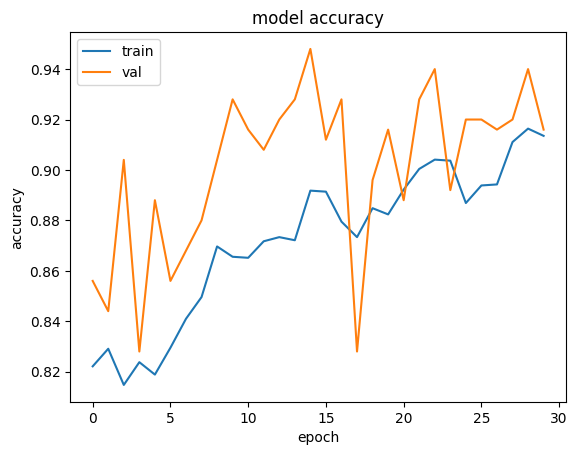

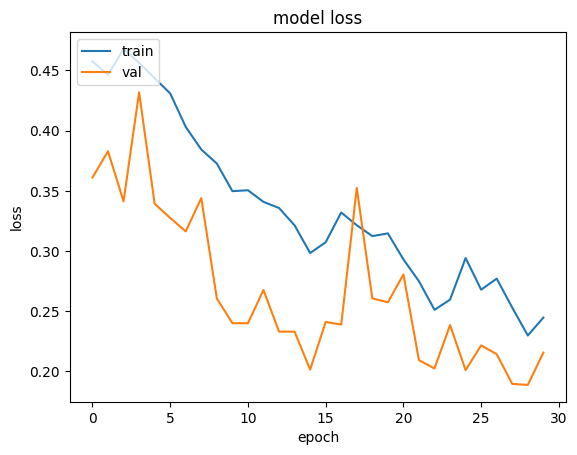

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# Créer un callback pour sauvegarder le meilleur modèle basé sur la performance de validation
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Entraîner le modèle avec le callback
history = model.fit(
     train_ds,
     epochs=EPOCHS,
     batch_size=BATCH_SIZE,
     verbose=1,
     validation_data=val_ds,
     callbacks=[checkpoint])


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

  # Plot history: loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 162ms/step - loss: 0.2490 - accuracy: 0.9180


[0.24897512793540955, 0.9179999828338623]

First Prediction

first image to predict
actual label: meningioma_tumor
8/8 [==============================] - 0s 26ms/step
predicted label: meningioma_tumor


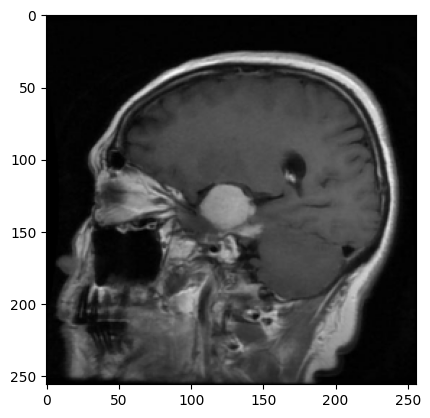

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_labels[first_label])

  batch_predic = model.predict(image_batch)
  print("predicted label:", class_labels[np.argmax(batch_predic[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Prediction of 9 images with one confidence for each prediction

1/1 [==============================] - 0s 19ms/step


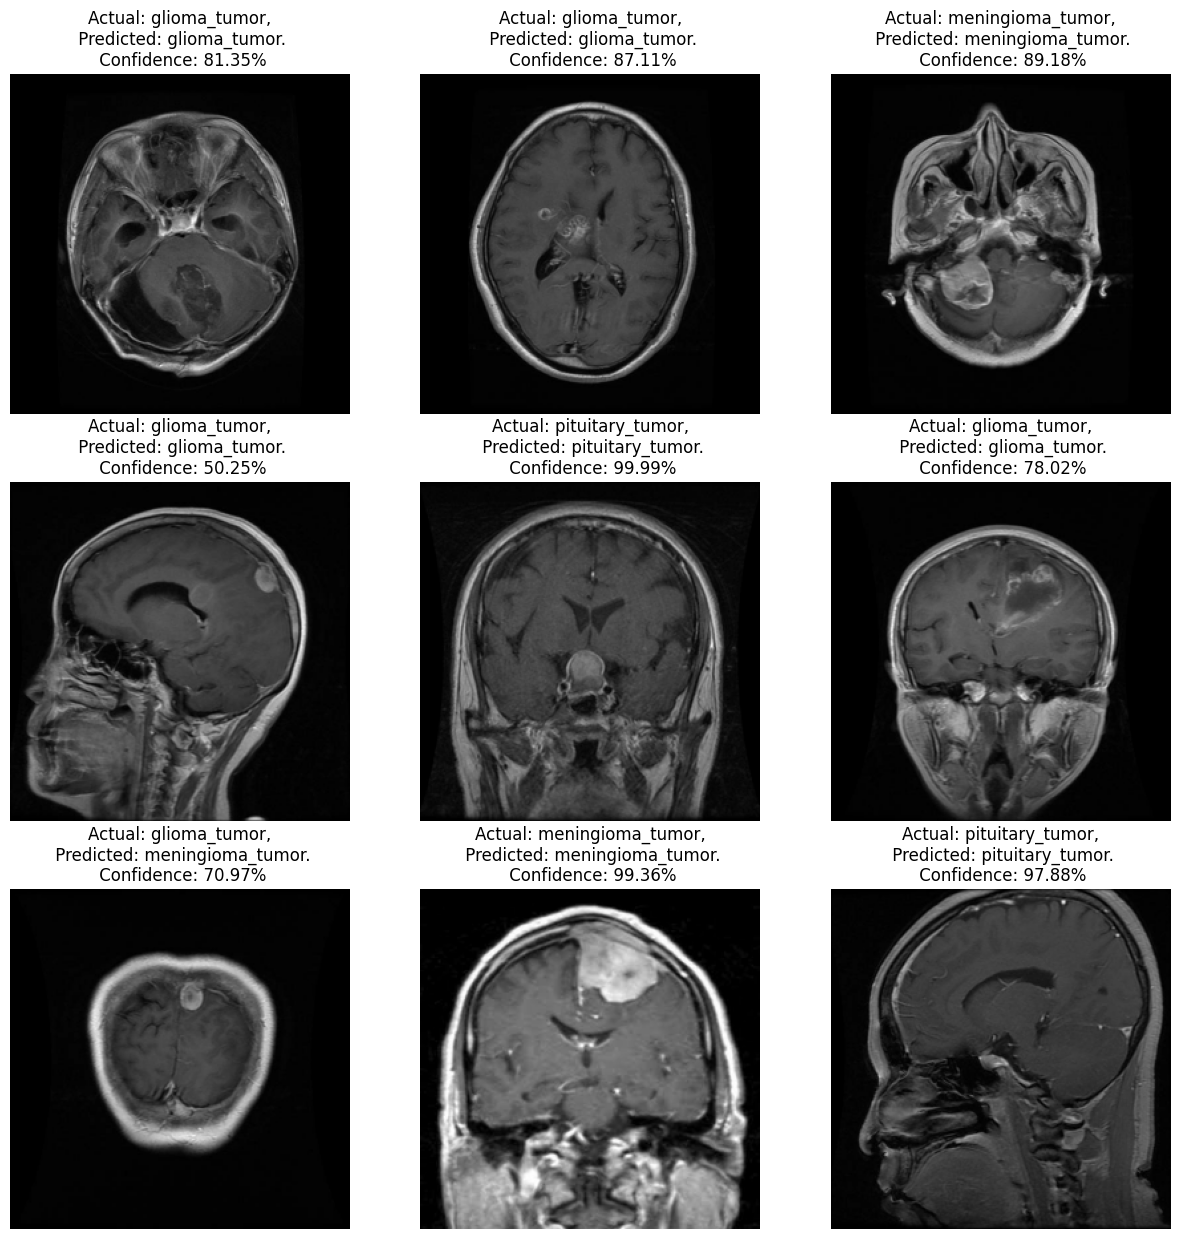

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_labels[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Saving the model and reading it out later

In [ ]:
model.save(f"{'/kaggle/working/'}/models")

In [ ]:
model.load_weights(f"{'/kaggle/working'}/models")

The confusion Matrix

2/2 [==============================] - 0s 184ms/step


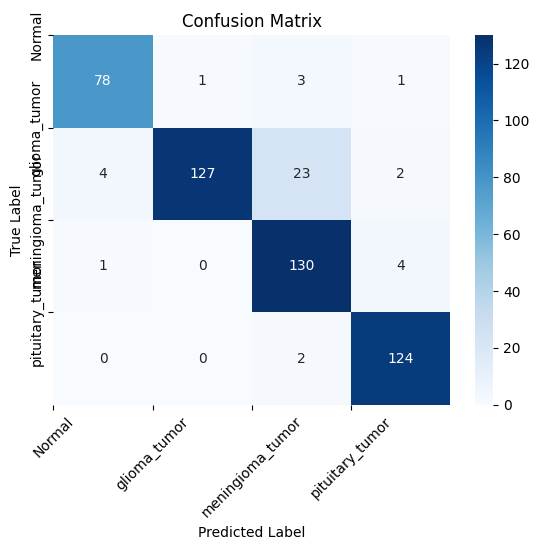

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prédire les classes pour les données de test
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Calculer la matrice de confusion
class_names = ['Normal', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
confusion_mtx = confusion_matrix(y_true, y_pred_classes, labels=range(len(class_names)))

# Afficher la matrice de confusion
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Confusion Matrix')
plt.show()


Reminder and score F1

In [ ]:
from sklearn.metrics import classification_report

class_names = ['Normal', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


2/2 [==============================] - 0s 182ms/step
                  precision    recall  f1-score   support

          Normal       0.94      0.94      0.94        83
    glioma_tumor       0.99      0.81      0.89       156
meningioma_tumor       0.82      0.96      0.89       135
 pituitary_tumor       0.95      0.98      0.96       126

        accuracy                           0.92       500
       macro avg       0.93      0.93      0.92       500
    weighted avg       0.93      0.92      0.92       500

